In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dir = '/content/drive/MyDrive/DS320Project/'
airbnb = pd.read_csv(dir + 'AIRBNB_2019.csv')
crimes = pd.read_csv(dir + 'Crimes_2019.csv')

In [ ]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb = airbnb.drop(["host_id", "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count"], axis=1)

In [ ]:
airbnb = airbnb[airbnb['price'] < 6000]

In [ ]:
airbnb.head(5)

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


In [ ]:
crimes.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [ ]:
crimes = crimes.drop(["CMPLNT_FR_DT", "CMPLNT_TO_DT", "CMPLNT_FR_TM", "CMPLNT_TO_TM", "ADDR_PCT_CD", "KY_CD", "OFNS_DESC", "PD_CD", "PD_DESC", "CRM_ATPT_CPTD_CD", "LOC_OF_OCCUR_DESC", "JURIS_DESC", "JURISDICTION_CODE", "PARKS_NM", "HADEVELOPT", "HOUSING_PSA", "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "TRANSIT_DISTRICT", "PATROL_BORO", "STATION_NAME", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX", "X_COORD_CD", "Y_COORD_CD", "Lat_Lon"], axis = 1)

In [ ]:
crimes.head(5)

,CMPLNT_NUM,RPT_DT,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude
0,206889907,12/31/2019,MISDEMEANOR,BRONX,DEPARTMENT STORE,40.823657,-73.836407
1,206890249,12/31/2019,MISDEMEANOR,BRONX,CHAIN STORE,40.879727,-73.824438
2,206890300,12/31/2019,VIOLATION,QUEENS,OTHER,40.606219,-73.750710
3,206890306,12/31/2019,MISDEMEANOR,QUEENS,COMMERCIAL BUILDING,40.677597,-73.828216
4,206896384,12/31/2019,MISDEMEANOR,BRONX,VARIETY STORE,40.852099,-73.828920


In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

airbnb_locat = np.radians(airbnb[['latitude', 'longitude']])
crimes_locat = np.radians(crimes[['Latitude', 'Longitude']])

tree = BallTree(crimes_locat, metric='haversine')

radius_km = .2
radius_radians = radius_km / 6371.0

crime_counts = tree.query_radius(airbnb_locat, r=radius_radians, count_only=True)

In [ ]:
airbnb['crime_count'] = crime_counts

In [ ]:
airbnb.head(5)

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,crime_count
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,66
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,303
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,296
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,122
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,652


In [ ]:
airbnb.isnull().sum()

,0
id,0
name,16
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0


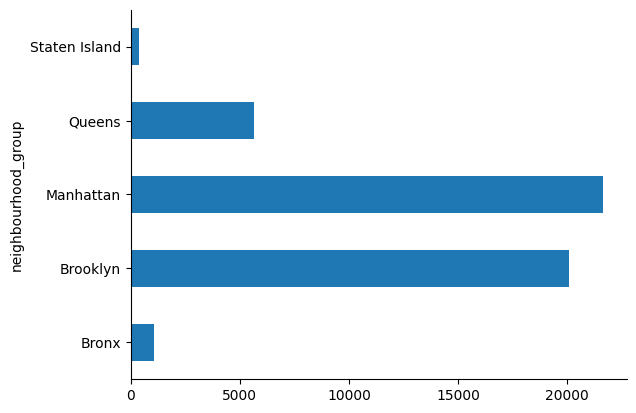

In [ ]:
import seaborn as sns
airbnb.groupby('neighbourhood_group').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

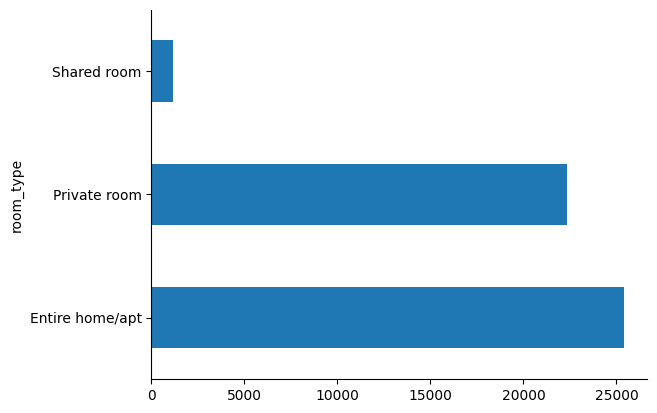

In [ ]:
airbnb.groupby('room_type').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,crime_count
count,4.887700e+04,48877.000000,48877.000000,48877.000000,48877.000000,48877.000000,48877.000000,48877.000000
mean,1.901708e+07,40.728946,-73.952162,149.832416,7.021687,23.282178,112.760133,231.703705
std,1.098269e+07,0.054535,0.046160,184.781125,20.489636,44.556897,131.609800,171.997053
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.471997e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.000000,108.000000
50%,1.967722e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000,192.000000
75%,2.915163e+07,40.763110,-73.936270,175.000000,5.000000,24.000000,227.000000,315.000000
max,3.648724e+07,40.913060,-73.712990,5250.000000,1250.000000,629.000000,365.000000,2575.000000


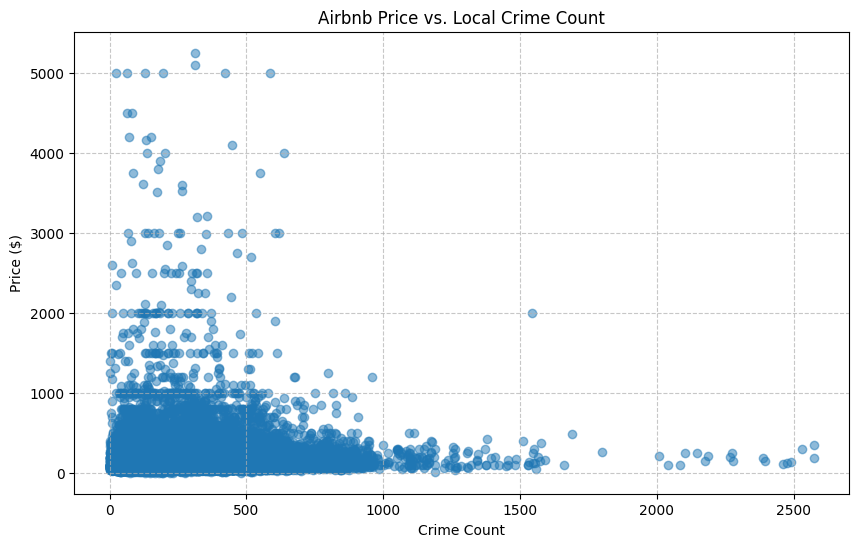

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(airbnb['crime_count'], airbnb['price'], alpha=0.5)
plt.xlabel('Crime Count')
plt.ylabel('Price ($)')
plt.title('Airbnb Price vs. Local Crime Count')
plt.grid(True, linestyle='--', alpha=0.7)

In [ ]:
pearson_corr = airbnb['price'].corr(airbnb['crime_count'], method='pearson')
print("Pearson Correlation Coefficient:", pearson_corr)

Pearson Correlation Coefficient: 0.10038081717803533


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

features = ['crime_count', 'minimum_nights', 'room_type', 'availability_365', 'latitude', 'longitude', "number_of_reviews"]
target = 'price'

df = pd.get_dummies(airbnb[features + [target]], drop_first=True)

X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [10, 50, 100],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor Results:")
print("Best Params:", knn_grid.best_params_)
print("MAE Score:", mae_knn)
print("R² Score:", r2_knn)

KNN Regressor Results:
Best Params: {'n_neighbors': 100, 'p': 1, 'weights': 'distance'}
MAE Score: 61.495827154430536
R² Score: 0.2214936506843983


In [ ]:
randfor = RandomForestRegressor(random_state=42)

randfor_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 3]}

randfor_grid = GridSearchCV(randfor, randfor_params, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)
randfor_grid.fit(X_train, y_train)

best_randfor = randfor_grid.best_estimator_
y_pred_randfor = best_randfor.predict(X_test)

print("Random Forest Results:")
print("Best Params:", randfor_grid.best_params_)
print("MAE Score:", mean_absolute_error(y_test, y_pred_randfor))
print("R² Score:", r2_score(y_test, y_pred_randfor))

Random Forest Results:
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MAE Score: 61.76925443526958
R² Score: 0.21404737429250698
